# Finance 5330 - Homework 2
## Jared Hansen, A01439768

## Import statements, set seed

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
import scipy.stats as stats
import math
import statsmodels
from statsmodels.tsa.stattools import adfuller
from sklearn import linear_model

np.random.seed(123456)

# Problem 1

$\textbf{1.1}$  
Simulate T = 500 observations from an AR(1) process for $\phi \in \{0.25, 0.5, 0.75, 0.8, 0.9\}$ where $y_t = \phi y_{t-1} + \epsilon_t$ .

In [7]:
def gen_AR1(phi_val):
    
    """
    This function generates an AR(1) process of T=500 steps for a given phi_val
    """
    
    # Number of observations in the series.
    T = 500
    
    # Generate the epislon terms vector.
    epsilon_t = np.random.normal(size = T-1)
    
    # Create a vector to store the series {y_t}
    y_t = np.empty(T)
    
    # Intialize the first value, y_0, outside of the loop
    y_t[0] = 0
    
    # Populate the y_t array with the AR(1) series
    for i in range(T-1):
        y_t[i+1] = phi_val * y_t[i] + epsilon_t[i]
        
    return y_t
    
    
# Generate the AR(1) series for each value of phi
y_phi_25 = gen_AR1(0.25)
y_phi_5  = gen_AR1(0.5)
y_phi_75 = gen_AR1(0.75)
y_phi_8  = gen_AR1(0.8)
y_phi_9  = gen_AR1(0.9)

$\textbf{1.2}$  
Treat the artificial data from the simulations above as observed data by an econometrician.

Noted, and will do.

$\textbf{1.3}$  
Estimate each model via OLS.

In [8]:
def fit_OLS(orig_series):
    
    """
    This function takes a series as input, creates an additional once-differenced series from the original series,
    and then regresses the original series on the once-differenced series. The function returns the fitted regression object.    
    """
    
    # Create the one-value-shifted series
    series_shifted = orig_series[1:]
    
    # Cut off the first value in the original series
    orig_series = orig_series[0:-1]
    
    # Regress the original series on the shifted series
    ols_reg = stats.linregress(series_shifted, orig_series)
    
    return ols_reg


# Fit an OLS model for each of the series.
ols_25 = fit_OLS(y_phi_25)
ols_5  = fit_OLS(y_phi_5)
ols_75 = fit_OLS(y_phi_75)
ols_8  = fit_OLS(y_phi_8)
ols_9  = fit_OLS(y_phi_9)

$\textbf{1.4}$  
Test the standard null hypothesis of $H_0: \phi = 0$ versus $H_A: \phi \ne 0$ with a standard t-test for significance levels $\alpha \in \{0.01, 0.05, 0.1\}$ for each one and report the results in a table.  
Provide test statistics, standard errors, critical values, and p-values.

$\textbf{NOTE:}$ I found the critcal values specified below at this URL. They are essentially the same critical values that we'd use if assuming data from a standard normal distribution (this makes sense, as N = 500 for a t distribution is very close to just being a standard normal distribution.)  
https://resources.saylor.org/wwwresources/archived/site/wp-content/uploads/2015/07/BUS204-FinalExamAid-TandZDistributionTables-CCBY.pdf  
- Critical value for $\bigg[ \alpha = 0.01 \bigg]$: 2.58570  
- Critical value for $\bigg[ \alpha = 0.05 \bigg]$: 1.96472  
- Critical value for $\bigg[ \alpha = 0.1 \bigg]$: 1.64791

In [37]:
def gen_test_results(ols_reg):
    
    """
    This function taks a regression object as input, and outputs a tuple containing the value of a test statistic, 
    standard error, and p-value for the given regression.
    """
    
    # Here, test statistic is (estimated phi - 0)/(stderr_phi)
    test_stat = round((ols_reg[0] / ols_reg[-1]), 4)
    
    # standard error
    std_error = round((ols_reg[-1]), 4)
    
    # p-value
    p_val = ols_reg[3]

    return test_stat, std_error, p_val
    


hyp_test_phi_25 = gen_test_results(ols_25)
hyp_test_phi_5  = gen_test_results(ols_5)
hyp_test_phi_75 = gen_test_results(ols_75)
hyp_test_phi_8  = gen_test_results(ols_8)
hyp_test_phi_9  = gen_test_results(ols_9)

$\textbf{NOTE:}$ See markdown cell above for critical values used to determine rejection/failure to reject $H_0$.

| $\phi$ | test_stat | std_error | p-value                  | Reject or Fail to Reject $H_0$?                               |
|--------|-----------|-----------|--------------------------|----------------------------------------------------------|
| 0.25   | 6.4792    | 0.0431    | 2.2217 $\times 10^{-10}$ | Reject $H_0$ $\forall$ $\alpha \in \{0.01, 0.05, 0.1\} $ |
| 0.5    | 12.2582   | 0.0393    | 2.2848 $\times 10^{-30}$ | Reject $H_0$ $\forall$ $\alpha \in \{0.01, 0.05, 0.1\} $ |
| 0.75   | 25.2269   | 0.0297    | 5.1171 $\times 10^{-91}$ | Reject $H_0$ $\forall$ $\alpha \in \{0.01, 0.05, 0.1\} $ |
| 0.8    | 30.6217   | 0.0264    | 1.7202 $\times 10^{-116}$| Reject $H_0$ $\forall$ $\alpha \in \{0.01, 0.05, 0.1\} $ |
| 0.9    | 48.0478   | 0.0189    | 2.2848 $\times 10^{-189}$| Reject $H_0$ $\forall$ $\alpha \in \{0.01, 0.05, 0.1\} $ |

$\textbf{1.5}$  
Pick one of the parameter values for the models above and do the following:

$\textbf{NOTE:}$ I am selecting $\phi = 0.9$ as my parameter for this question.

$\textbf{1.5 -- (A)}$
-  Use the Central Limit Theorem to derive a sampling distribution of $\hat{\phi}$. Present the parameter values of the sampling distribution. Produce a graph of the distribution.

0.018877503119918645

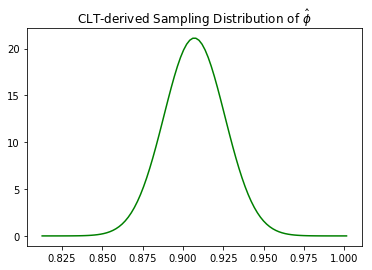

In [53]:
mean_phi_distn = ols_9[0]
stDev_phi_distn = ols_9[-1]

x_vals_plot = np.linspace(mean_phi_distn - 5*stDev_phi_distn,
                          mean_phi_distn + 5*stDev_phi_distn,
                          100)
plt.plot(x_vals_plot,
         stats.norm.pdf(x_vals_plot, mean_phi_distn, stDev_phi_distn),
         c = "g")
plt.title("CLT-derived Sampling Distribution of $\hat{\phi}$")

For the CLT-derived sampling distribution of $\hat{\phi}$ above, the center (mean) parameter is:

In [64]:
round(mean_phi_distn, 5)

0.90702

For the CLT-derived sampling distribution of $\hat{\phi}$ above, the scale (standard deviation) parameter is:

In [56]:
round(stDev_phi_distn, 5)

0.01888

$\textbf{1.5 -- (B)}$  
- Use parametric Monte Carlo to simulate the sampling distribution. Use M = 10,000 repititions. Use the sample mean and standard deviation to estimate the parameter values of the distribution. Produce a histogram.

Text(0.5, 1.0, "Histogram of $\\hat{\\phi}$ sampling dist'n from parametric Monte Carlo")

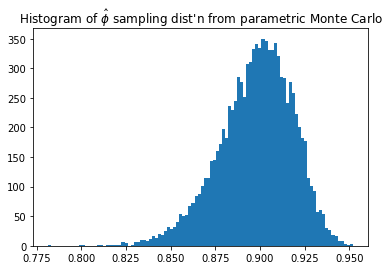

In [58]:
def gen_y_hats(series, phi_hat):
    """
    This function will generate predicted y-hat values (a series) for a given
    slope (phi_hat) parameter. It is perfectly linear, no white nosie error term
    """
    y_hats = phi_hat*series
    return y_hats
    
    
# Set the phi parameter
phi_hat = ols_9[0]


# Generate predictions using gen_y_hats fctn
y_hats = gen_y_hats(y_phi_9, phi_hat)


# Drop the first value in order to calculate residuals
#y_hats = y_hats[1:]


# Calculate the residuals of the predicted values VS the true values
residuals = y_phi_9 - y_hats


# For the "parametric" part of parametric Monte Carlo, we now take the residuals
# to estimate parameters for a normal distn for the white noise part of the model
mu_eps = np.mean(residuals)
stDev_eps = np.std(residuals)


def gen_AR1_MoCarl(phi_hat, mu_eps, stDev_eps):
    """
    This function generates an AR(1) process time series using parametric Monte Carlo simulation
    based on the parameters passed into the function.
    """
    
    # Number of observations in the series
    T = 500
    
    # Generate the epislon terms vector
    eps_t = np.random.normal(loc=mu_eps, scale=stDev_eps, size=T-1)
    
    # Create a vector to store the series {y_t}
    y_t = np.empty(T)
    
    # Intialize the first value, y_0, outside of the loop
    y_t[0] = 0
    
    # Create the time series
    for i in range(T-1):
        y_t[i+1] = phi_hat * y_t[i] + eps_t[i]
    return y_t


# Set the number of simulation repititions
M = 10000


# Simulate 10000 different series and compute the regression (and regr params)
# for each of them
phi_MC = np.empty(M)

for i in range(M):
    #    The inner parentheses generates a parametric Monte Carlo series based on the parameters
    # we pass (our phi_hat, and the center and stDev of white noise process).
    #    The outer part then fits an OLS regression onto this MC series, and uses
    # the function above to access the new predicted slope (phi_hat for that
    # series).
    #    This then gets stored in the array of all Monte Carlo phi's (phi_MC).
    phi_MC[i] = fit_OLS(gen_AR1_MoCarl(phi_hat, mu_eps, stDev_eps))[0]
    
    
# Use the sample mean and standard deviation to estimate parameter values of 
# the distribtuion (of phi's).
est_mu_phi_MC = np.mean(phi_MC)
est_sd_phi_MC = np.std(phi_MC)
    
    
# Plot a histogram
plt.hist(phi_MC, bins=100)
plt.title("Histogram of $\hat{\phi}$ sampling dist'n from parametric Monte Carlo")

The estimated mean of the Monte-Carlo-generated sampling distribution for $\hat{\phi}$ pictured above is:

In [59]:
round(est_mu_phi_MC, 5)

0.89769

The estimated standard deviation of the Monte-Carlo-generated sampling distribution for $\hat{\phi}$ pictured above is:

In [60]:
round(est_sd_phi_MC, 5)

0.02062

$\textbf{1.5 -- (C)}$
- Use the IID bootstrap to simulate the sampling distribution. Use B = 10,000 repititions. Use the sample mean and standard deviation to estimate the parameter values of the distribution. Produce a histogram.

Text(0.5, 1.0, "Histogram of $\\hat{\\phi}$ sampling dist'n from IID bootstrap")

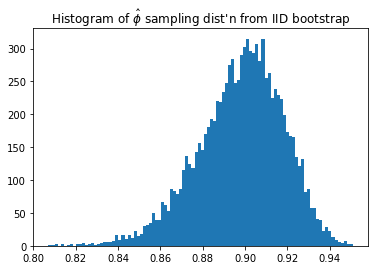

In [61]:
def gen_AR1_boot(phi_hat):
    """
    This function generates an AR(1) process time series using an IID bootstrap simulation
    based on the phi parameter passed into the function.
    """
    
    # Number of observations in the series
    T = 500
    
    # Generate the epislon terms vector by IID bootstrapping 499 observations
    # from the residuals generated above ( they were generated during Monte Carlo).
    eps_t = np.random.choice(residuals, size=T-1)
    
    # Create a vector to store the series {y_t}
    y_t = np.empty(T)
    
    # Intialize the first value, y_0, outside of the loop
    y_t[0] = 0
    
    # Create the series
    for i in range(T-1):
        y_t[i+1] = phi_hat * y_t[i] + eps_t[i]
        
    return y_t


# Set the number of simulation repititions
B = 10000


# Simulate 10000 different series and compute the regression (and regr params)
# for each of them
phi_boot = np.empty(B)

for i in range(B):
    #    The inner part generates a bootstrapped series based on the parameter
    # we pass (phi_hat).
    #    The outer part then fits an OLS regression onto this bootstrapped series
    # and uses the function above to access the new predicted slope (phi_hat for
    # that series).
    #    This then gets stored in the array of all bootstrapped phi's (phi_boot).
    phi_boot[i] = fit_OLS(gen_AR1_boot(phi_hat))[0]
    
# Use the sample mean and standard deviation to estimate parameter values of 
# the distribtuion (of phi's).
est_mu_phi_boot = np.mean(phi_boot)
est_sd_phi_boot = np.std(phi_boot)
    
# Plot a histogram
plt.hist(phi_boot, bins=100)
plt.title("Histogram of $\hat{\phi}$ sampling dist'n from IID bootstrap")

The estimated mean of the IID-bootstrapped-generated sampling distribution for $\hat{\phi}$ pictured above is:

In [62]:
round(est_mu_phi_boot, 5)

0.89785

The estimated standard deviation of the IID-bootstrapped-generated sampling distribution for $\hat{\phi}$ pictured above is:

In [63]:
round(est_sd_phi_boot, 5)

0.02015

$\textbf{1.5 -- (D)}$  
- Compare all three methods

Mainly, the two things we're interested in are:  
- How close the estimated center $\mu_{\hat{\phi}}$ of the distribution is to the true value of $\phi = 0.9$.
- The spread of the distribution of our estimator. How efficient is the method for parameter estimation?  
- (Might be interested in) the symmetry of the distribution.

Thoughts on the simulations we did:  
1. On all of these fronts, the parametric Monte Carlo estimator and the IID bootstrap estimator look to give nearly identical performance. They both (for this seed run) give a center estimate of about $\hat{\phi} = 0.898$, and have standard deviation of about $\sigma_{\hat{\phi}} = 0.02$. The sampling distribution for the bootstrap might be a tad tighter about the center, but it's fairly negligible.  
2. One thing of interest to note: the sampling distribution for both the Monte Carlo and the bootstrap simulations are slightly left-skewed (longer left tails). Due to the mathematical construction of the Central Limit Theorem, it does not have this skewness, but is symmmetric about the estimated mean of the sampling distribution.
3. We can see that the CLT-derived sampling distribution has slightly smaller variance than both MC and the bootstrap $ [ \sigma_{\hat{\phi}} = 0.188 ] < [ \sigma_{\hat{\phi}} =  0.02 ] $. Also, due to it's symmetric nature it is a highly favorable estimator. But, for this seed, it's estimated center is slightly farther from the true $\phi = 0.9$ than the MC or boostrap estimates. Here, the CLT method estimates the center to be $\hat{\phi} = 0.90702$.
4. All in all, the CLT distribution is probably best, but only by a touch. The Monte Carlo and bootstrap estimators both proved to be robust estimators of the $\phi$ parameter, and would be a good choice we are looking at real-world data and can't (or shouldn't) assume some parametric distribution.

$\textbf{1.6}$  
Return to the problem in 5 above and redo the simulation from step one, but replace the error distribution with a student-T distribution with df=5 (degrees of freedom parameter). Even though we know at the generation stage that the errors come from the student-T distribution, the econometrician assumes a normal distribution when using the CLT and parametric Monte Carlo. The bootstrap obviously does not need to make such assumptions. Compare to the results above.

First, generate the new series using a student-T distribution for draws for the white noise process.

In [65]:
def gen_AR1_studentT(phi_val):
    """
    This function takes a phi value as input and creates an AR(1) time series that draws
    the white noise values from a student-T distribution with df=5.
    """
    
    # Number of obs in the series
    T = 500
    
    # Generate the epislon terms vector USING STUDENT-T DISTRIBUTION
    epsilon_t = np.random.standard_t(size = T-1, df=5)
    
    # Create a vector to store the series {y_t}
    y_t = np.empty(T)
    
    # Intialize the first value, y_0, outside of the loop
    y_t[0] = 0
    
    for i in range(T-1):
        y_t[i+1] = phi_val * y_t[i] + epsilon_t[i]
        
    return y_t
    
    
# Generate the new series (different method for generating white noise: student-T)
y_phi_9_student = gen_AR1_studentT(0.9)

# Perform the regression for this new series using previously-defined function
ols_9_student = fit_OLS(y_phi_9_student)

$\textbf{1.6 -- (A)}$  
-  Use the Central Limit Theorem to derive a sampling distribution of $\hat{\phi}$. Present the parameter values of the sampling distribution. Produce a graph of the distribution.

Text(0.5, 1.0, 'CLT-derived Sampling Distribution of $\\hat{\\phi}$, STUDENT-T VERSION')

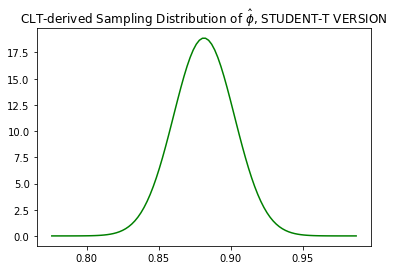

In [68]:
mean_phi_distn_stud = ols_9_student[0]
stDev_phi_distn_stud = ols_9_student[-1]

x_vals_plot = np.linspace(mean_phi_distn - 5*stDev_phi_distn,
                          mean_phi_distn + 5*stDev_phi_distn,
                          100)
plt.plot(x_vals_plot,
         stats.norm.pdf(x_vals_plot, mean_phi_distn_stud, stDev_phi_distn_stud),
         c = "g")
plt.title("CLT-derived Sampling Distribution of $\hat{\phi}$, STUDENT-T VERSION")

The mean parameter for the CLT-derived sampling distribution of $\hat{\phi}$  generated using student-T for errors is: 

In [69]:
round(mean_phi_distn_stud, 5)

0.88137

The standard deviation parameter for the CLT-derived sampling distribution of $\hat{\phi}$  generated using student-T for errors is: 

In [70]:
round(stDev_phi_distn_stud, 5)

0.02113

$\textbf{1.6 -- (B)}$  
- Use parametric Monte Carlo to simulate the sampling distribution. Use M = 10,000 repititions. Use the sample mean and standard deviation to estimate the parameter values of the distribution. Produce a histogram.

Text(0.5, 1.0, 'Monte-Carlo-derived Sampling Distribution of $\\hat{\\phi}$, STUDENT-T VERSION')

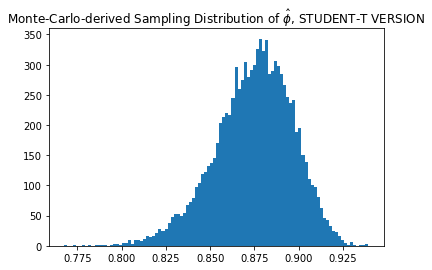

In [72]:
# Set the phi parameter
phi_hat = ols_9_student[0]

# Generate predictions using fctn and new STUDENT-T generated series
y_hats_student = gen_y_hats(y_phi_9_student, phi_hat)

# Drop the first value: never mind, this is unnecessary
# y_hats_student = y_hats_student

# Calculate the residuals of the predicted values VS the true values
residuals_student = y_phi_9_student - y_hats_student

# For the "parametric" part of parametric Monte Carlo, we now take the residuals
# to estimate parameters for a normal distn for the white noise part of the model
mu_eps_student = np.mean(residuals_student)
stDev_eps_student = np.std(residuals_student)

# Set the number of simulation repititions
M = 10000

# Simulate 100 different series and compute the regression (and regr params)
# for each of them
phi_MC_student = np.empty(M)
for i in range(M):
    # The inner part generates a parametric Monte Carlo series based on the parameters
    # we pass (our phi_hat, and the center and stDev of white noise process).
    # The outer part then fits an OLS regression onto this MC series, and uses
    # the function above to access the new predicted slope (phi_hat for that
    # series).
    # This then gets stored in the array of all Monte Carlo phi's (phi_MC).
    phi_MC_student[i] = fit_OLS(gen_AR1_MoCarl(phi_hat,
                  mu_eps_student,
                  stDev_eps_student))[0]
    
# Use the sample mean and standard deviation to estimate parameter values of 
# the distribtuion (of PHI's).
est_mu_phi_MC_student = np.mean(phi_MC_student)
est_sd_phi_MC_student = np.std(phi_MC_student)
    
# Plot a histogram
plt.hist(phi_MC_student, bins=100)
plt.title("Monte-Carlo-derived Sampling Distribution of $\hat{\phi}$, STUDENT-T VERSION")

The mean parameter for the Monte-Carlo-derived sampling distribution of $\hat{\phi}$  generated using student-T for errors is: 

In [73]:
round(est_mu_phi_MC_student, 5)

0.8747

The standard deviation parameter for the Monte-Carlo-derived sampling distribution of $\hat{\phi}$  generated using student-T for errors is: 

In [75]:
round(est_sd_phi_MC_student, 5)

0.02194

$\textbf{1.6 -- (C)}$
- Use the IID bootstrap to simulate the sampling distribution. Use B = 10,000 repititions. Use the sample mean and standard deviation to estimate the parameter values of the distribution. Produce a histogram.

Text(0.5, 1.0, 'IID-bootstrap-derived Sampling Distribution of $\\hat{\\phi}$, STUDENT-T VERSION')

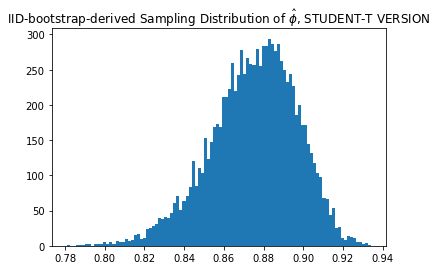

In [76]:
def gen_AR1_boot_stud(phi_hat):
    """
    This function generates an AR(1) process time series using an IID bootstrap simulation
    based on the phi parameter passed into the function and the residuals created by using
    STUDENT-T distribution for the white noise process.
    """
    
    # Number of observations in the series
    T = 500
    
    # Generate the epislon terms vector by IID bootstrapping 499 observations
    # from the residuals generated above (during Monte Carlo).
    eps_t = np.random.choice(residuals_student, size=T-1)
    
    # Create a vector to store the series {y_t}
    y_t = np.empty(T)
    
    # Intialize the first value, y_0, outside of the loop
    y_t[0] = 0
    
    # Populate the series
    for i in range(T-1):
        y_t[i+1] = phi_hat * y_t[i] + eps_t[i]
        
    return y_t


# Set the number of simulation repititions
B = 10000


# Simulate 100 different series and compute the regression (and regr params)
# for each of them
phi_boot_stud = np.empty(B)

for i in range(B):
    # The inner part generates a parametric Monte Carlo series based on the parameters
    # we pass (our phi_hat, and the center and stDev of white noise process).
    # The outer part then fits an OLS regression onto this MC series, and uses
    # the function above to access the new predicted slope (phi_hat for that
    # series).
    # This then gets stored in the array of all Monte Carlo phi's (phi_MC).
    phi_boot_stud[i] = fit_OLS(gen_AR1_boot_stud(phi_hat))[0]
    
    
# Use the sample mean and standard deviation to estimate parameter values of 
# the distribtuion (of PHI's).
est_mu_phi_boot_stud = np.mean(phi_boot_stud)
est_sd_phi_boot_stud = np.std(phi_boot_stud)
    
    
# Plot a histogram
plt.hist(phi_boot_stud, bins=100)
plt.title("IID-bootstrap-derived Sampling Distribution of $\hat{\phi}$, STUDENT-T VERSION")

The mean parameter for the IID-bootstrap-derived sampling distribution of $\hat{\phi}$  generated using student-T for errors is: 

In [77]:
round(est_mu_phi_boot_stud, 5)

0.87501

The standard deviation parameter for the IID-bootstrap-derived sampling distribution of $\hat{\phi}$  generated using student-T for errors is: 

In [79]:
round(est_sd_phi_boot_stud, 5)

0.02176

$\textbf{1.6 -- (D)}$  
- Compare to the results above

Mainly, the two things we're interested in are:  
- How close the estimated center $\mu_{\hat{\phi}}$ of the distribution is to the true value of $\phi = 0.9$, and how did the estimation methods compare when the time series is simulated using a student-T distribution for error terms?
- The spread of the distribution of our estimator. How efficient is the method for parameter estimation? Was it more/less efficient than the data that had normally-distributed error terms?  
- (Might be interested in) the symmetry of the distributions.

Thoughts on the simulations we did:  
1. On all of these fronts, the parametric Monte Carlo estimator and the IID bootstrap estimator look to give nearly identical performance once again. They both (for this seed run) give a center estimate of about $\hat{\phi} = 0.875$, and have standard deviation of about $\sigma_{\hat{\phi}} = 0.022$. Comparing to the estimation in $\textbf{1.5}$, we can see that the estimates are more biased; the means here are slightly further from 0.9 for the MC and bootstrap estimators due to the white noise process having student-T distribution. Also, we can see that the estimators aren't as efficient, since they have a higher standard deviation (0.022 > 0.02 from above).
2. One thing of interest to note: the sampling distribution for both the Monte Carlo and the bootstrap simulations are slightly left-skewed (longer left tails) once again. Due to the mathematical construction of the Central Limit Theorem, it does not have this skewness, but is symmmetric about the estimated mean of the sampling distribution.
3. We can see that the CLT-derived sampling distribution has slightly smaller variance than both MC and the bootstrap $ [ \sigma_{\hat{\phi}} = 0.21 ] < [ \sigma_{\hat{\phi}} =  0.022 ] $. Also, due to it's symmetric nature it is a highly favorable estimator. But, for this seed, it's estimated center is a bit off from the true $\phi = 0.9$. Here, the CLT method estimates the center to be $\hat{\phi} = 0.88137$, which is slightly better than MC and bootstrap (this was not the case in $\textbf{1.5}$: it was the opposite).
4. All in all, the CLT distribution is probably best, but only by a touch. The Monte Carlo and bootstrap estimators both proved to be robust estimators of the $\phi$ parameter, and would be a good choice we are looking at real-world data and can't (or shouldn't) assume some parametric distribution.  
5. Also, we can see a definite effect due to the error distribution being generated from a student-T distribution. These estimators, however, still do a fairly good job, suggesting they'll work well on real data.

# Problem 2

$\textbf{2.1}$  
Simulate T = 500 time steps for the following two equations:  
$y_t = y_{t-1} - u_{1,t}$  
$x_t = x_{t-1} - u_{2,t}$  
where $u_{j,t}$ such that $j \in \{1,2\}$ are independent white noise processes.

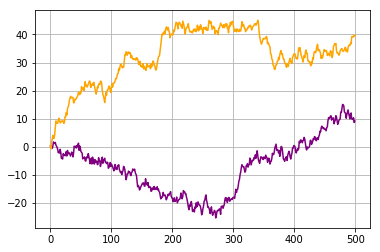

In [80]:
# The number of time steps
T = 500

# This creates the series {y_t}
y = np.cumsum(np.random.normal(size=T))

# Turn the y numpy array into a Pandas series
ts1 = pd.Series(y)


# This creates the series {x_t}
x = np.cumsum(np.random.normal(size=T))

# Turn the x numpy array into a Pandas series
ts2 = pd.Series(x)


# Plot the series
ts1.plot(grid=True, color="purple")
ts2.plot(grid=True, color="orange")

$\textbf{2.2}$  
Next regress $y_t$ on $x_t$ and estimate $\beta$ (slope coefficient) via OLS in the following regression:  
$y_t = \alpha + \beta x_t + \epsilon_t$

In [81]:
reg = stats.linregress(x,y)

# Estimate of beta (slope coefficient)
reg[0]

-0.3975101801082845

$\textbf{2.3}$  
Test the null hypothesis $H_0: \beta = 0$ against the alternative $H_A: \beta \ne 0$. Use the standard t-test with standard significance levels $\alpha \in \{0.01, 0.05, 0.1\}$.  
What should you find?  
What do you find?

In [82]:
p_val = reg[3]  
p_val

2.6131917174240577e-21

We obtain a miniscule p-value; p = $2.6132 \times 10^{-21}$ for the seed I'm working with.  
As such, we reject $H_0$ for all significance levels.  
We SHOULD find that we fail to reject at all levels of $\alpha$ (since the series aren't actually correlated) but we didn't find this. (And likely won't for most simulations.) The low p-value suggests that the series are cointegrated, when in reality it just looks this way because both series are related to time similarly. Time is a "confounding factor."

$\textbf{2.4}$  
Repeat the process M = 50,000 times and store the $\beta$ coefficients for each run of the simulation.

In [88]:
# Number of observations in each of the simulated series
T = 500

# Number of simulated series
M = 50000

# Empty array to store beta values generated from simulation
betas = np.empty(M)

# Empty array to store R^2 values generated from simulation (just for fun, assignment doesn't specify)
r_sqrd = np.empty(M)

# Populate the betas and r_sqrd arrays via 50,000 simulations
for i in range(M):
    # Create the two series
    y = np.cumsum(np.random.normal(size=T))
    x = np.cumsum(np.random.normal(size=T))
    # Regress y on x
    reg = stats.linregress(x,y)
    # Store the beta coefficient for that regression in the array
    betas[i] = reg.slope
    r_sqrd[i] = reg.rvalue**2
    # Theoretically, all of the r-squared values should be 0

$\textbf{2.5}$  
Summarize the simulated sampling distribution for $\beta$.

The mean parameter for the simulated sampling distribution of $\beta$  is: 

In [89]:
mean_betas = np.mean(betas)  
mean_betas

0.0014075007274527997

The standard deviation parameter for the simulated sampling distribution of $\beta$  is: 

In [90]:
stDev_betas = np.std(betas)
stDev_betas

0.6314988333419048

Also, from the histogram below, we can see that the simulated sampling distribution of $\beta$ looks to be very normal. In fact, thsi histogram brings me great joy due to how normal it looks. $\textbf{A thing of beauty!}$

$\textbf{2.6}$  
Make a histogram plot of the simulated coefficients.

Text(0.5, 1.0, 'Simulated Sampling Distribution of Beta')

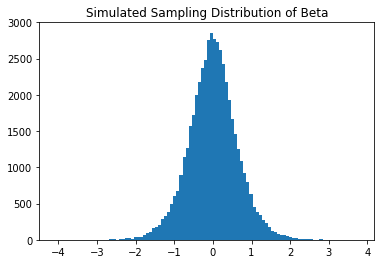

In [97]:
plt.hist(betas, bins=100);
plt.title("Simulated Sampling Distribution of Beta")

# Problem 3

Repeat the exercise in Problem 1 above for $\phi = 1.0$.

$\textbf{3.1}$  
Simulate T = 500 observations using the equation $y_t = \phi y_{t-1} + \epsilon_t$ where $\phi = 1.0$.

In [98]:
# Simply use the AR(1) function defined above to create this series
y_phi_1 = gen_AR1(1.0)

$\textbf{3.2}$  
Treat the artificial data from the simulation as observed data by an econometrician.

Noted, and will do.

$\textbf{3.3}$  
Estimate the model for these data via OLS.

In [99]:
# Simply use the fit_OLS function defined above to do this for the unit-root series.
ols_1 = fit_OLS(y_phi_1)

$\textbf{3.4}$  
Test the standard null hypothesis of $H_0: \phi = 0$ versus $H_A: \phi \ne 0$ with a standard t-test for significance levels $\alpha \in \{0.01, 0.05, 0.1\}$ and report the results in a table.  
Provide test statistics, standard errors, critical values, and p-values.

In [101]:
# Simply use the function defined above, gen_test_results, to find the value of the test stat, std_err, and p-value
hyp_test_phi_1 = gen_test_results(ols_1)
hyp_test_phi_1

(172.053, 0.0058, 0.0)

$\textbf{NOTE:}$ See markdown cell $\textbf{1.4}$ above for critical values used to determine rejection/failure to reject $H_0$.

| $\phi$ | test_stat | std_error | p-value                  | Reject or Fail to Reject $H_0$?                          |
|--------|-----------|-----------|--------------------------|----------------------------------------------------------|
| 1.0    | 172.053   | 0.0058    | $\approx 0$              | Reject $H_0$ $\forall$ $\alpha \in \{0.01, 0.05, 0.1\} $ |  

$\textbf{3.5 -- (A)}$  
-  Use the Central Limit Theorem to derive a sampling distribution of $\hat{\phi}$. Present the parameter values of the sampling distribution. Produce a graph of the distribution. 

Text(0.5, 1.0, 'CLT-derived Sampling Distribution of $\\hat{\\phi}$ where $\\phi = 1.0$')

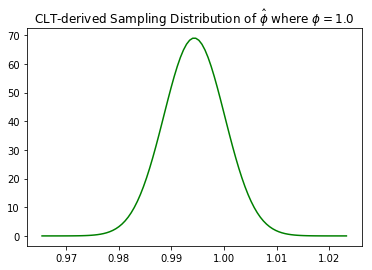

In [105]:
mean_phi1_distn = ols_1[0]
stDev_phi1_distn = ols_1[-1]

x_vals_plot = np.linspace(mean_phi1_distn - 5*stDev_phi1_distn,
                          mean_phi1_distn + 5*stDev_phi1_distn,
                          100)
plt.plot(x_vals_plot,
         stats.norm.pdf(x_vals_plot, mean_phi1_distn, stDev_phi1_distn),
         c = "g")
plt.title("CLT-derived Sampling Distribution of $\hat{\phi}$ where $\phi = 1.0$")

The estimated mean parameter for the CLT-derived sampling distribution of $\hat{\phi}$ above where $\phi = 1.0$ is:

In [106]:
round(mean_phi1_distn, 5)

0.99432

The estimated standard deviation parameter for the CLT-derived sampling distribution of $\hat{\phi}$ above where $\phi = 1.0$ is:

In [107]:
round(stDev_phi1_distn, 5)

0.00578

$\textbf{3.5 -- (B)}$
- Use parametric Monte Carlo to simulate the sampling distribution. Use M = 10,000 repititions. Use the sample mean and standard deviation to estimate the parameter values of the distribution. Produce a histogram.

Text(0.5, 1.0, "Histogram of $\\hat{\\phi}$ sampling dist'n from parametric Monte Carlo where $\\phi = 1.0$")

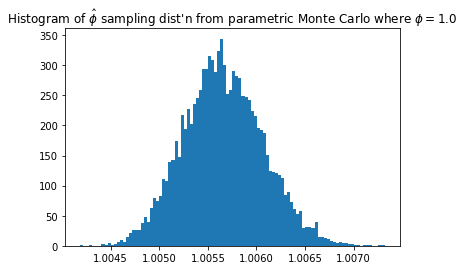

In [108]:
# Set the phi parameter
phi1_hat = ols_1[0]


# Generate predictions using gen_y_hats fctn
y_hats_phi1 = gen_y_hats(y_phi_1, phi1_hat)


# Drop the first value in order to calculate residuals
#y_hats = y_hats[1:]


# Calculate the residuals of the predicted values VS the true values
residuals_phi1 = y_phi_1 - y_hats_phi1


# For the "parametric" part of parametric Monte Carlo, we now take the residuals
# to estimate parameters for a normal distn for the white noise part of the model
mu_eps_phi1 = np.mean(residuals_phi1)
stDev_eps_phi1 = np.std(residuals_phi1)


# Set the number of simulation repititions
M = 10000


# Simulate 10000 different series and compute the regression (and regr params)
# for each of them
phi1_MC = np.empty(M)

for i in range(M):
    #    The inner parentheses generates a parametric Monte Carlo series based on the parameters
    # we pass (our phi_hat, and the center and stDev of white noise process).
    #    The outer part then fits an OLS regression onto this MC series, and uses
    # the function above to access the new predicted slope (phi_hat for that
    # series).
    #    This then gets stored in the array of all Monte Carlo phi's (phi_MC).
    phi1_MC[i] = fit_OLS(gen_AR1_MoCarl(phi1_hat, mu_eps_phi1, stDev_eps_phi1))[0]
    
    
# Use the sample mean and standard deviation to estimate parameter values of 
# the distribtuion (of phi's).
est_mu_phi1_MC = np.mean(phi1_MC)
est_sd_phi1_MC = np.std(phi1_MC)
    
    
# Plot a histogram
plt.hist(phi1_MC, bins=100)
plt.title("Histogram of $\hat{\phi}$ sampling dist'n from parametric Monte Carlo where $\phi = 1.0$")

The estimated mean of the Monte-Carlo-generated sampling distribution for $\hat{\phi}$ pictured above (where truth is $\phi = 1.0) is:

In [109]:
round(est_mu_phi1_MC, 5)

1.00566

The estimated standard deviation of the Monte-Carlo-generated sampling distribution for $\hat{\phi}$ pictured above (where truth is $\phi = 1.0) is:

In [110]:
round(est_sd_phi1_MC, 5)

0.00041

$\textbf{3.5 -- (C)}$
- Use the IID bootstrap to simulate the sampling distribution. Use B = 10,000 repititions. Use the sample mean and standard deviation to estimate the parameter values of the distribution. Produce a histogram.

Text(0.5, 1.0, "Histogram of $\\hat{\\phi}$ sampling dist'n from IID bootstrap where $\\phi = 1.0$")

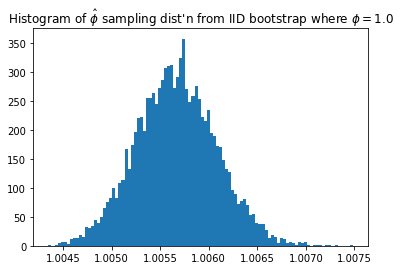

In [111]:
def gen_AR1_boot_phi1(phi_hat):
    """
    This function generates an AR(1) process time series using an IID bootstrap simulation
    based on the phi parameter passed into the function.
    """
    
    # Number of observations in the series
    T = 500
    
    # Generate the epislon terms vector by IID bootstrapping 499 observations
    # from the residuals generated above ( they were generated during Monte Carlo).
    eps_t = np.random.choice(residuals_phi1, size=T-1)
    
    # Create a vector to store the series {y_t}
    y_t = np.empty(T)
    
    # Intialize the first value, y_0, outside of the loop
    y_t[0] = 0
    
    # Create the series
    for i in range(T-1):
        y_t[i+1] = phi_hat * y_t[i] + eps_t[i]
        
    return y_t


# Set the number of simulation repititions
B = 10000


# Simulate 10000 different series and compute the regression (and regr params)
# for each of them
phi1_boot = np.empty(B)

for i in range(B):
    #    The inner part generates a bootstrapped series based on the parameter
    # we pass (phi_hat).
    #    The outer part then fits an OLS regression onto this bootstrapped series
    # and uses the function above to access the new predicted slope (phi_hat for
    # that series).
    #    This then gets stored in the array of all bootstrapped phi's (phi_boot).
    phi1_boot[i] = fit_OLS(gen_AR1_boot_phi1(phi1_hat))[0]
    
# Use the sample mean and standard deviation to estimate parameter values of 
# the distribtuion (of phi's).
est_mu_phi1_boot = np.mean(phi1_boot)
est_sd_phi1_boot = np.std(phi1_boot)
    
# Plot a histogram
plt.hist(phi1_boot, bins=100)
plt.title("Histogram of $\hat{\phi}$ sampling dist'n from IID bootstrap where $\phi = 1.0$")

The estimated mean of the IID-bootstrap-generated sampling distribution for $\hat{\phi}$ pictured above (where truth is $\phi = 1.0) is:

In [112]:
round(est_mu_phi1_boot, 5)

1.00566

The estimated standard deviation of the IID-bootstrap-generated sampling distribution for $\hat{\phi}$ pictured above (where truth is $\phi = 1.0) is:

In [113]:
round(est_sd_phi1_boot, 5)

0.00041

$\textbf{3.5 -- (D)}$  
- Compare all three methods (comment on your findings).

Mainly, the two things we're interested in are:  
- How close the estimated center $\mu_{\hat{\phi}}$ of the distribution is to the true value of $\phi = 1.0$.
- The spread of the distribution of our estimator. How efficient is the method for parameter estimation?  
- (Might be interested in) the symmetry of the distribution.

Thoughts on the simulations we did:  
1. On all of these fronts, the parametric Monte Carlo estimator and the IID bootstrap estimator look to give nearly identical performance AGAIN (this seems to be a theme throughout these simulations). They both (for this seed run) give a center estimate of about $\hat{\phi} = 1.006$, and have standard deviation of about $\sigma_{\hat{\phi}} = 0.0004$. The Monte Carlo distribution looks to be slightly more symmetric, while the bootstrap distribution looks to be slightly right skewed.  
2. Due to the mathematical construction of the Central Limit Theorem, it does not have this skewness, but is symmmetric about the estimated mean of the sampling distribution.
3. We can see that the CLT-derived sampling distribution has much larger variance (a whole order of magnitude larger!) than both MC and the bootstrap $ [ \sigma_{\hat{\phi}} = 0.006 ] >> [ \sigma_{\hat{\phi}} =  0.0004 ] $. Additionally (for this seed) the estimated center for the CLT estimator is about equally far away from the true $\phi = 1.0$ as both the MC and the boostrap estimates. Here, the CLT ($\hat{\phi} = 0.994$), MC, and bootstrap (both $\hat{\phi} = 1.006$) methods estimate the center to be 0.006 away from the true value of $\phi = 1.0$.
4. All in all, the Monte Carlo estimator is probably the best. All of the sampling distributions have similarly biased estimates of the mean (bias of about 0.006 each), but the MC and bootstrap have much smaller variance. The reason I'd say that we favor the bootstrap is that its sampling distribution appears to be more symmetrical.
5. It's very intersting that the CLT gets outperformed by both MC and the bootstrap here. My guess is that this is inteded to illustrate the fact that more parametric methods break down when the regression estimation isn't valid (since we can't use OLS in a valid way when dealing with a unit root as we are here where $\phi = 1.0$).

# Problem 4

$\textbf{4.1}$  
Simulate T = 500 time steps from the random walk model $x_t = x_{t-1} + u_{1,t}$

In [131]:
# Number of time steps (number of observations)
T = 500

# Simulate the T = 500 time teps from the random walk model: x_t = x_{t-1} + u_{1,t}
x = np.cumsum(np.random.normal(size=T))

$\textbf{4.2}$  
Next, simulate T = 500 time steps from the model $y_t = \alpha + \beta x_t + \epsilon_t$  
where $\alpha = 0.22$, $\beta = 2.50$, and $\epsilon \sim N(0,1)$ is a white noise process.

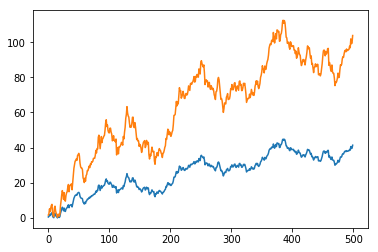

In [132]:
# Parameters for the I(1) process simulated below.
alpha = 0.22
beta = 2.5

# Cointegration data-generating process (white noise~N(0,1) in the equation below)
eps_t = np.random.normal()

# Simulate the T = 500 time steps from the model: y_t = alpha + beta*x_t + eps_t
y = alpha + beta*x + eps_t

# Let's plot them together.
plt.plot(x)
plt.plot(y)

$\textbf{4.3}$  
Use the augmented Dickey-Fuller test to check for the presence of a unit root in both $y_t$ and $x_t$.  
What do you find?  
What should you find?

In [133]:
adf_y = adfuller(y, regression = "ct", maxlag = 10)
adf_y

(-2.9088413531512094,
 0.1593735428001341,
 3,
 496,
 {'1%': -3.9771388706173187,
  '5%': -3.419378714066722,
  '10%': -3.132279040879324},
 2256.3178945404297)

Based on the p-value >> 0.05 (or any other common significance level), we fail to reject $H_0$: there is a unit root ($\phi \ge 1$), with $H_A$: there is no unit root.  
This seems a bit odd, since we know the actual root of this equation is 2.5 (the $\beta$ set above). But this makes sense: the ADF test is phrased "If the pvalue is above a critical size, then we cannot reject that there is a unit root." In other words, we can't definitvely say that there is not a unit root for this series (double negative, but it's the best way I can articulate it).  
Had $\beta$ been equal to something like 0.3, we would have found a small p-value and rejected $H_0$ (rejected the presence of a unit root for the series $y_t$).

In [134]:
adf_x = adfuller(x, regression = "ct", maxlag = 10)
adf_x

(-2.908841353151222,
 0.15937354280013027,
 3,
 496,
 {'1%': -3.9771388706173187,
  '5%': -3.419378714066722,
  '10%': -3.132279040879324},
 1360.1855587675063)

Again, based on the p-value >> 0.05 (or any other common significance level) we fail to reject $H_0$ (the same $H_0$ above: presence of a unit root).  
This is indeed what we should find. We know this, because the generating process for the $x_t$ series has a value of $\phi = 1.0$. We didn't explicitly write it in the prompt, but it's implicitly known that the $x_{t-1}$ term in $x_t = x_{t-1} + u_{2,t}$ is multiplied by 1, where this 1 = $\phi_x$.

$\textbf{4.4}$  
Implement the Engle-Granger two-step method by:  
$\textbf{A.}$ First, test for cointegration by submitting $\hat{\epsilon_t}$ to the ADF test. What do you find?  
$\textbf{B.}$ Obtain $\hat{\beta}$ via OLS.  
$\textbf{C.}$ Estimate the error-correction model with p=1 and include contemporaneous $x_t$.

$\textbf{4.4 -- (A)}$  
Test for cointegration by submitting $\hat{\epsilon_t}$ to the ADF test. What do you find?

In [135]:
# Calculate the residuals eps_hat_t
reg = stats.linregress(x,y)   # regress y on x
eps = y - reg.intercept - reg.slope*x

# Submit eps_hat_t to the ADF test
adf_eps = adfuller(eps, maxlag = 10)
adf_eps

(-2.0240177220102478,
 0.27614245578103713,
 8,
 491,
 {'1%': -3.4437386290417082,
  '5%': -2.867444458865948,
  '10%': -2.5699148492415413},
 -30445.20859998257)

The small p-value (with the current seed, p-val = 0.335) $\implies$ no presence of unit-root in epsilon series, which is what we'd expect from a random, white noise process.

$\textbf{4.4 -- (B)}$  
Obtain $\hat{\beta}$ via OLS.

In [136]:
beta_hat = reg.slope
beta_hat

2.4999999999999996

This comes out to be $\hat{\beta} = 2.5$, which is what we specified at the beginning of the problem.

$\textbf{4.5 -- (C)}$  
Estimate the error-correction model with p=1 and contemporaneous $x_t$.

To fix the problem of spurrious regression, we have to do differencing to make the series stationary.  
Change: $ \bigg[y_t = y_{t-1} + \epsilon_t \bigg]
\rightarrow \bigg[ y_t - y_{t-1} = \epsilon_t \bigg]
= \bigg[ \Delta Y = \epsilon_t \bigg] $  

Then regress $\Delta Y$ on $\Delta X$: $ \bigg[ {\Delta Y}_t = \alpha + \beta {\Delta X}_t + \epsilon_t \bigg]$  
Here $\beta = \bigg[ \dfrac{Cov(\Delta Y, \Delta X)}{Var(\Delta X)} \bigg]
= \bigg[ \rho \dfrac{\sigma_{\Delta Y}}{\sigma_{\Delta X}} \bigg] $



For:  
- $ y_t \sim I(1) $  
- $ x_t \sim I(1) $  
- $ \hat{\epsilon_t} \sim I(0) $  
- $ y_t = \alpha + \beta x_t + \epsilon_t $  
- $ \big(E[\nu_{i,t}] = 0 \big)$ for $i \in \{1,2\}$ white noise error process
    
- We'll get the cointegrating vector [1, -$\beta$] $\rightarrow \beta$ gives an indication of how strong the relationship is between the series ${x_t}$ and ${y_t}$. Larger $ | \beta | $ means stronger cointegration.
- With strong cointegration the asymptotic properties of the beta estimator are even better than for beta in a standard, cross-sectional OLS regression.
    
Every CoInt relationship implies an ERROR CORRECTION FORM:  
${\Delta y}_t, {\Delta x}_t$  
$y_t, x_t \rightarrow  \hat{\epsilon_t} = \bigg[ y_{t-1} - \hat{\alpha} - \hat{\beta}  x_{t-1} \bigg] $
    
ECM(1) -- equation1:  
-----------------------------
$ \bigg[ {\Delta y}_t = (\mu_1) + (\lambda_1)(\hat{\epsilon_t})
                   + (\gamma_1)({\Delta y}_{t-1}) + (\delta_1)({\Delta x}_{t-1}) + (\nu_{1,t}) \bigg] == $   
$ \bigg[ (y_t - y_{t-1}) = (\mu_1) + (\lambda_1) \big( y_{t-1} - \hat{\alpha} - \hat{\beta} x_{t-1} \big)
      + (\gamma_1) \big( y_{t-1} - y_{t-2} \big) + (\delta_1) \big( x_{t-1} - x_{t-2} \big) + (\nu_{1,t}) \bigg] $
        
ECM(1) -- equation2: 
-----------------------------
$ \bigg[ {\Delta x}_t = (\mu_2) + (\lambda_2)(\hat{\epsilon_t})
                   + (\gamma_2)({\Delta y}_{t-1}) + (\delta_2)({\Delta x}_{t-1}) + (\nu_{2,t}) \bigg] == $   
$ \bigg[ (x_t - x_{t-1}) = (\mu_2) + (\lambda_2) \big( y_{t-1} - \hat{\alpha} - \hat{\beta} x_{t-1} \big)
      + (\gamma_2) \big( y_{t-1} - y_{t-2} \big) + (\delta_2) \big( x_{t-1} - x_{t-2} \big) + (\nu_{2,t}) \bigg] $
        
 
- where $\lambda_i$ is the speed of return to equilibrium: want large $ | \lambda_i | $, and we want high variation also for pairs trading.
- ideal pairs trading has high volatility (large variance in $\hat{\epsilon_t}$), large $ | \lambda_i | $ and large $ | \hat{\beta} | $

In [137]:
# This creates the deltaY and deltaX series
deltaY = y[1:] - y[:-1]
deltaX = x[1:] - x[:-1]

# These arrays need to have the same length(s) and cut off the first value
# in order to do the ECM model above.
deltaY.shape
deltaX.shape
eps.shape

deltaY = deltaY[1:]
deltaX = deltaX[1:]
eps = eps[2:]


# Design matrix for our regression: we need N-2 rows, and 4 columns (4 terms in the regr)
X = np.ones((T-2,4))
X[:,1] = eps
X[:,2] = deltaY
X[:,3] = deltaX
Y = deltaY


# Now run regression of Y on X
# Use statsmodels or sk-learn to do the regression (statsmodels)
clf = linear_model.LinearRegression()
fitted_VECM_1 = clf.fit(X, Y)

3.885780586188048e-16

The parameter estimates for the regression of $y_t$ on $x_t$ in the VECM model equation  
$ \bigg[ {\Delta y}_t = (\mu_1) + (\lambda_1)(\hat{\epsilon_t})
                   + (\gamma_1)({\Delta y}_{t-1}) + (\delta_1)({\Delta x}_{t-1}) + (\nu_{1,t}) \bigg] $   
are (in order  $\mu_1, \lambda_1, \gamma_1, \delta_1$):

In [138]:
# This gives parameter estimates when regression Y on X, in the order:
#  mu_1, lambda_1, gamma_1, delta_1
fitted_VECM_1.coef_

array([ 0.        , -0.12493474,  0.97984728,  0.05038181])

In [ ]:
#=== We have to do this again, but for estimating the deltaX series by regressing
#=== X on Y (since they're related to each other).

# Now run regression of X on Y
# Use statsmodels or sk-learn to do the regression (statsmodels)
fitted_VECM_2 = clf.fit(X, deltaX)

The parameter estimates for the regression of $x_t$ on $y_t$ in the VECM model equation   
$ \bigg[ {\Delta x}_t = (\mu_2) + (\lambda_2)(\hat{\epsilon_t})
                   + (\gamma_2)({\Delta y}_{t-1}) + (\delta_2)({\Delta x}_{t-1}) + (\nu_{2,t}) \bigg] $   
are (in order  $\mu_2, \lambda_2, \gamma_2, \delta_2$):

In [139]:
# This gives parameter estimates when regression Y on X, in the order:
#  mu_2, lambda_2, gamma_2, delta_2
fitted_VECM_2.coef_

array([0.        , 0.04985637, 0.34507434, 0.13731414])